<a href="https://colab.research.google.com/github/lazy-wolf/python-class-notes/blob/main/A2_HuggingFace_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 7.2 MB/s eta 0:00:00


In [ ]:
%pip install transformers

In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset("cats_vs_dogs")

Generating train split:   0%|          | 0/23410 [00:00<?, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 23410
    })
})

In [ ]:
candidate_labels = dataset["train"].features["labels"].names

In [ ]:
candidate_labels

['cat', 'dog']

In [ ]:
dataset=dataset.shuffle(seed=42)

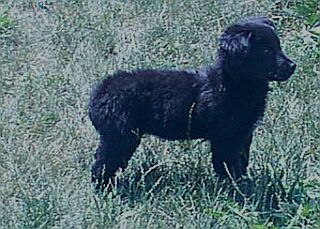

In [ ]:
dataset["train"][0]["image"]

In [ ]:
dataset["train"][0]["labels"]

1

In [6]:
images=[]
labels=[]
for i in range(20):
  images.append(dataset["train"][i]["image"])
  labels.append(dataset["train"][i]["labels"])

In [8]:
print(images[0])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7B03A0A6A500>


In [ ]:
from transformers import pipeline

checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor confi

In [ ]:
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
candidate_labels

['cat', 'dog']

In [ ]:
inputs = processor(images=images, text=candidate_labels, return_tensors="pt", padding=True)

In [ ]:
import torch

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
output_prob=outputs.logits_per_image.softmax(dim=-1).numpy().tolist()

In [ ]:
import numpy as np

In [ ]:
output_pred=[np.argmax(i) for i in output_prob]

In [ ]:
output_pred

[1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
labels

[1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
import matplotlib.pyplot as plt

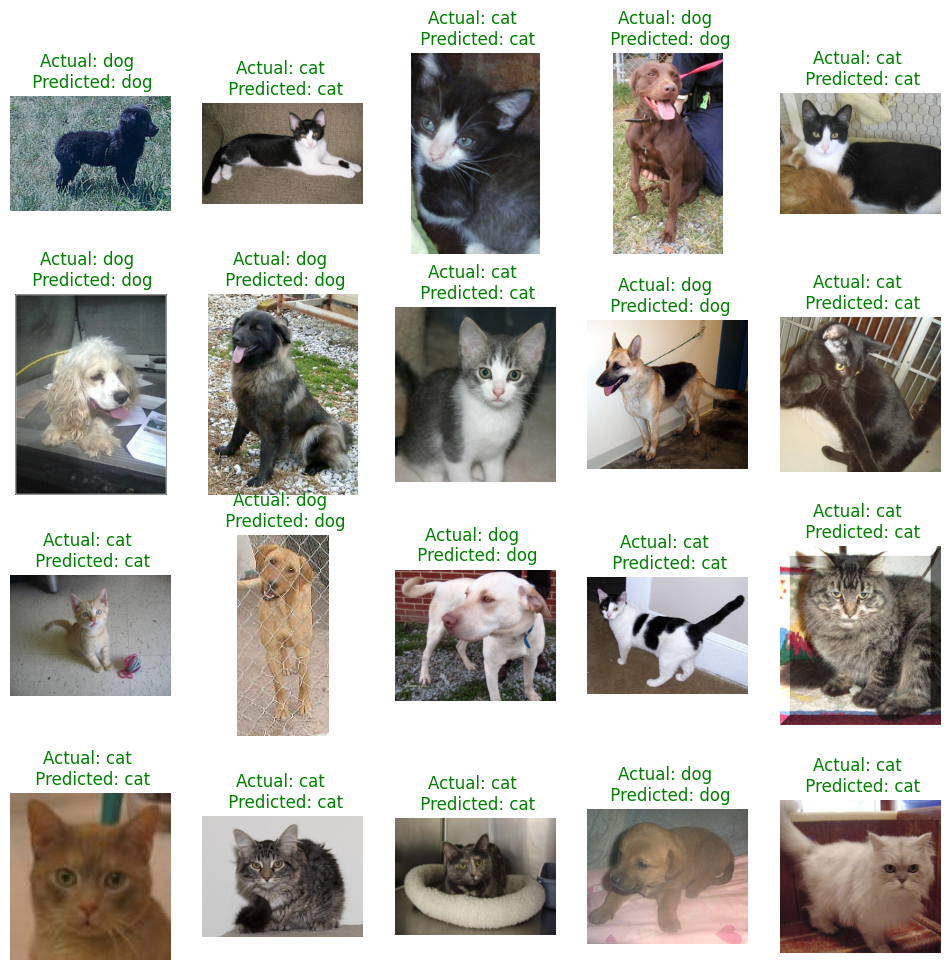

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i])
    actual_label = candidate_labels[labels[i]]
    predicted_label = candidate_labels[output_pred[i]]

    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'

    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color)
    plt.axis("off")

plt.show()